# Anotações importantes

yr_renovated = 0 irei considerar como casas que nunca foram reformadas. 
Assumirei que o número 33 (valor único) é um erro de digitação, pois não faz sentido devido ao tamanho da casa. Transformarei esse valor em 3. 

estatística descritiva foi utilizada para verificar possiveis valores errados e dar uma visão geral dos dados


price = preço que a casa está sendo vendida


# 0.0 Importar pacotes

In [1]:
import pandas as pd

import numpy as np

import plotly.express as px

from matplotlib import pyplot as plt

import seaborn as sns

from matplotlib import gridspec

import matplotlib.ticker as mtick

from datetime import datetime

import warnings

import tqdm

import ipywidgets as widgets

from ipywidgets import fixed

from tabulate import tabulate


/home/user/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Funções Auxiliares

In [4]:
pd.options.display.float_format = '{:.2f}'.format
    

plt.rcParams['figure.figsize'] = (11,7)

warnings.filterwarnings('ignore')

# 1.0 Dados

## 1.1 Importando dataset

In [3]:
df = pd.read_csv('dataset/kc_house_data.csv')

## 1.2 Dimensão dos dados

In [4]:
print('Número de linha:', df.shape[0])

print('Número de colunas:', df.shape[1])

Número de linha: 21613
Número de colunas: 21


## 1.3 Tipos de variáveis

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.4 Alterando os tipos de variáveis

In [6]:
df['date'] = pd.to_datetime(df['date']) 


## 1.5 Limpeza de dados

### 1.5.1 Duplicatas

In [7]:
df.sort_values('id').head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,2015-04-22,300000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
2496,1000102,2014-09-16,280000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
6735,1200019,2014-05-08,647500.00,4,1.75,2060,26036,1.00,0,0,...,8,1160,900,1947,0,98166,47.44,-122.35,2590,21891
8411,1200021,2014-08-11,400000.00,3,1.00,1460,43000,1.00,0,0,...,7,1460,0,1952,0,98166,47.44,-122.35,2250,20023
8809,2800031,2015-04-01,235000.00,3,1.00,1430,7599,1.50,0,0,...,6,1010,420,1930,0,98168,47.48,-122.27,1290,10320


In [8]:
df = df.drop_duplicates(subset = ['id'], keep = 'last')

df.sort_values('id').head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,2015-04-22,300000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
6735,1200019,2014-05-08,647500.00,4,1.75,2060,26036,1.00,0,0,...,8,1160,900,1947,0,98166,47.44,-122.35,2590,21891
8411,1200021,2014-08-11,400000.00,3,1.00,1460,43000,1.00,0,0,...,7,1460,0,1952,0,98166,47.44,-122.35,2250,20023
8809,2800031,2015-04-01,235000.00,3,1.00,1430,7599,1.50,0,0,...,6,1010,420,1930,0,98168,47.48,-122.27,1290,10320
3557,3600057,2015-03-19,402500.00,4,2.00,1650,3504,1.00,0,0,...,7,760,890,1951,2013,98144,47.58,-122.29,1480,3504


### 1.5.1 Check NA

In [9]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 1.5.2 Estatística descritiva

In [10]:
df = df.copy()

In [11]:
#Incluindo somente variáveis numéricas
atri_num = df.select_dtypes(include = ['int64', 'float64'])

#deletando a coluna 'ID'
atri_num = atri_num.iloc[:, 1: ]


        atributos     media   mediana       std      min        max
0           price 541649.96 450000.00 367306.36 75000.00 7700000.00
1        bedrooms      3.37      3.00      0.93     0.00      33.00
2       bathrooms      2.12      2.25      0.77     0.00       8.00
3     sqft_living   2082.70   1920.00    919.13   290.00   13540.00
4        sqft_lot  15135.64   7614.00  41537.65   520.00 1651359.00
5          floors      1.50      1.50      0.54     1.00       3.50
6      waterfront      0.01      0.00      0.09     0.00       1.00
7            view      0.24      0.00      0.77     0.00       4.00
8       condition      3.41      3.00      0.65     1.00       5.00
9           grade      7.66      7.00      1.17     1.00      13.00
10     sqft_above   1790.96   1560.00    829.01   290.00    9410.00
11  sqft_basement    291.74      0.00    442.77     0.00    4820.00
12       yr_built   1971.10   1975.00     29.38  1900.00    2015.00
13   yr_renovated     84.73      0.00    402.42 

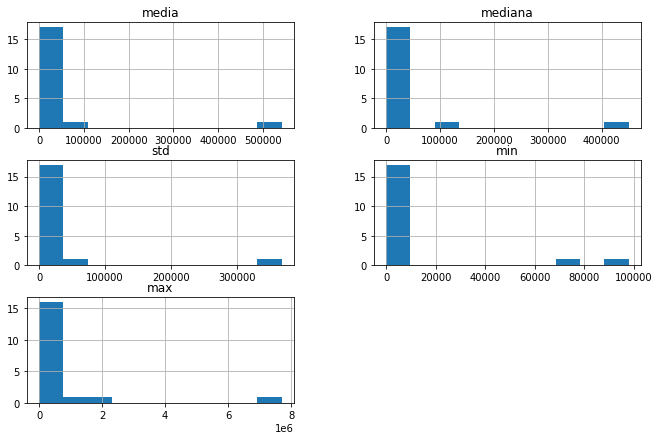

In [12]:
#análise descritiva
#medidas de tendencia central
df_mean =  pd.DataFrame(atri_num.apply(np.mean)).T
df_median = pd.DataFrame(atri_num.apply(np.median)).T

#medidas de dispersão 
df_std = pd.DataFrame(atri_num.apply(np.std)).T
df_min = pd.DataFrame(atri_num.apply(np.min)).T
df_max = pd.DataFrame(atri_num.apply(np.max)).T


#concatenando
est = pd.concat( [df_mean, df_median,  df_std, df_min, df_max ] ).T.reset_index()



#alterando o nome das colunas
est.columns = [ 'atributos','media', 'mediana', 'std', 'min', 'max']
print(est)
est.hist();


In [13]:
#substituindo o valor de 33 na coluna bedrooms por 3
linha = df[df['bedrooms'] == 33]

df = df.drop(15870)

df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10])

# 2.0 Exploração de dados

## Correlação

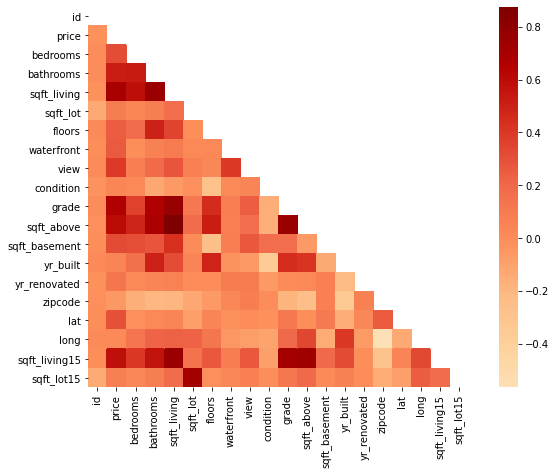

In [14]:
matrix = np.triu(df.corr())

sns.heatmap(df.corr(), cmap = 'OrRd', square = True, annot = False, center = 0,
             mask = matrix);




## 2.1 Insights

In [15]:
df = df.copy()

In [16]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### **H1:**   Imóveis com vista para a água são em média 30% mais caros

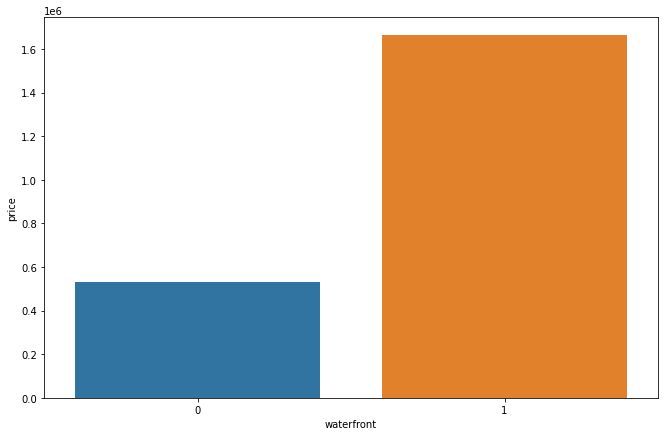

In [17]:
h1 = df[['price', 'waterfront']].groupby('waterfront').mean().reset_index()

h1['waterfront'] = h1['waterfront'].astype(str)

sns.barplot(h1['waterfront'], h1['price']);





### H2: Imóveis com data de construção menor que 1955 são em média 50% mais baratos.


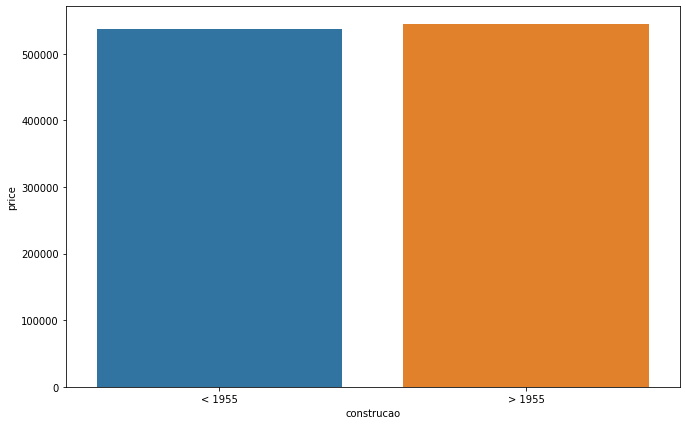

In [18]:
df = df.copy()

df['construcao'] = df['yr_built'].apply(lambda x: '> 1955' if x > 1955
                                                               else '< 1955')

h2 = df[['construcao', 'price']].groupby('construcao').mean().reset_index()

sns.barplot(h2['construcao'], h2['price']);

### H3: Imóveis sem porão possuem área total (sqrt_lot) são 40% maiores do que imóveis com 	porões.


In [7]:
df['porao'] = df['sqft_basement'].apply(lambda x: 'nao' if x == 0
                                                  else 'sim')


h3 = df[['porao', 'sqft_lot', 'price']].groupby('porao').sum().reset_index()

h3
# sns.barplot(h3['porao'], h3['sqft_lot']);

,porao,sqft_lot,price
0,nao,213746105,6390840572.00
1,sim,112760785,5282084436.00


### H4: O crescimento do preço dos imóveis ano após ano (YoY) é de 10%


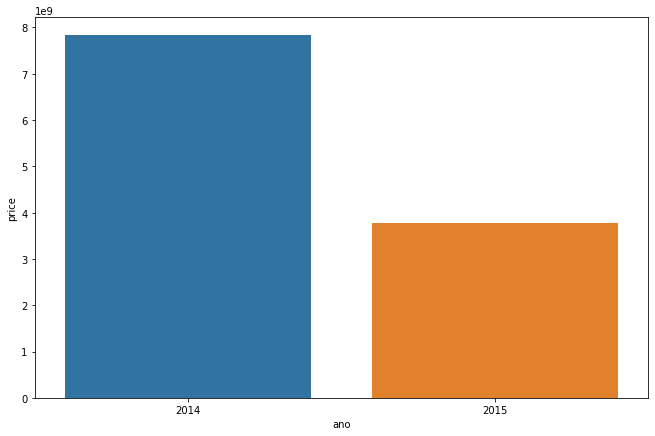

In [20]:
h4 = df[['price', 'ano']].groupby('ano').sum().reset_index()

h4['ano'] = h4['ano'].astype(str)

sns.barplot(h4['ano'], h4['price']);

### H4.1: O crescimento do preço dos imóveis MoM é de 10%

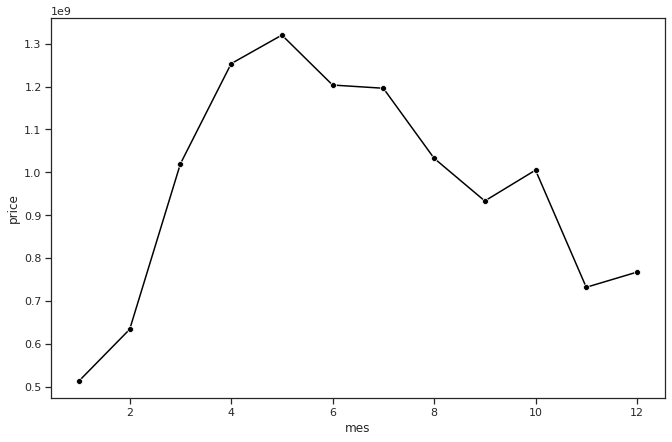

In [21]:
df['mes'] = df['date'].dt.month

h41 =  df[['mes', 'price']].groupby('mes').sum().reset_index()
#plt.bar(h41['mes'], h41['price'])

sns.set_theme(style="ticks")
sns.set_context('notebook')
sns.lineplot(data = h41, x = 'mes',  y = 'price', 
             markers = True, style = (1), legend = False, 
             color = 'black');


###  H5: Imóveis com 3 banheiros tem um crescimento mês após mês (MoM) de 15%.


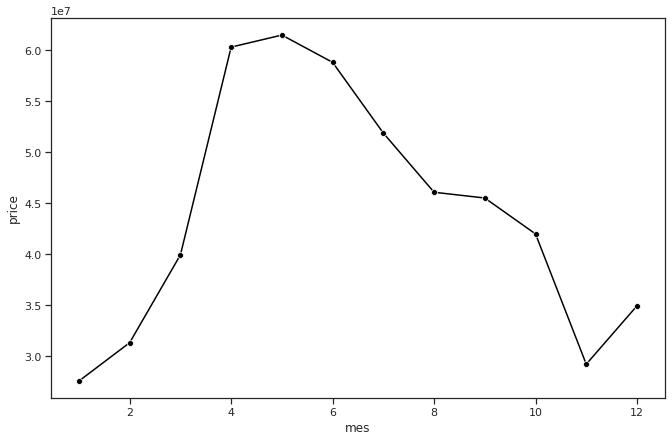

In [22]:
#df['mes'] = df['date'].dt.month

h5 = df[(df['bathrooms'] == 3)]

h5 = h5[['mes', 'price']].groupby('mes').sum().reset_index()


sns.lineplot(data = h5, x = 'mes', y = 'price', markers = True, style = (1), legend = False, color = 'black');




### H6: Imóveis que nunca foram reformadas (yr_renovated == 0) são em média 20% mais baratos. 


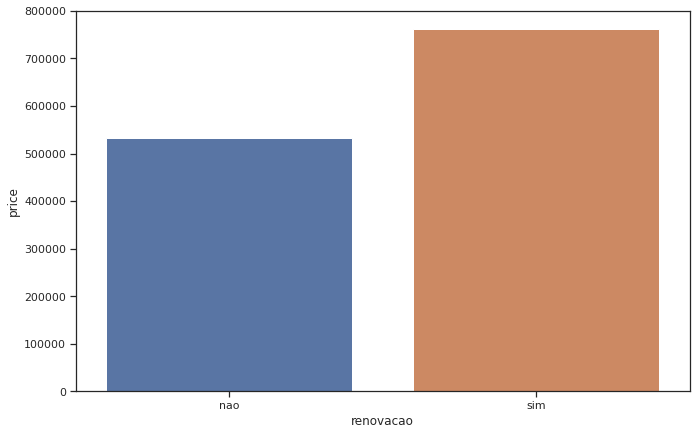

In [23]:
df['renovacao'] = df['yr_renovated'].apply(lambda x: 'sim' if x > 0 else
                                                     'nao'   )

h6 = df[['price', 'renovacao']].groupby('renovacao').mean().reset_index()

sns.barplot(h6['renovacao'], h6['price']);

### H7: Imóveis em más condições mas com boa vista (view) são 10% mais caros.


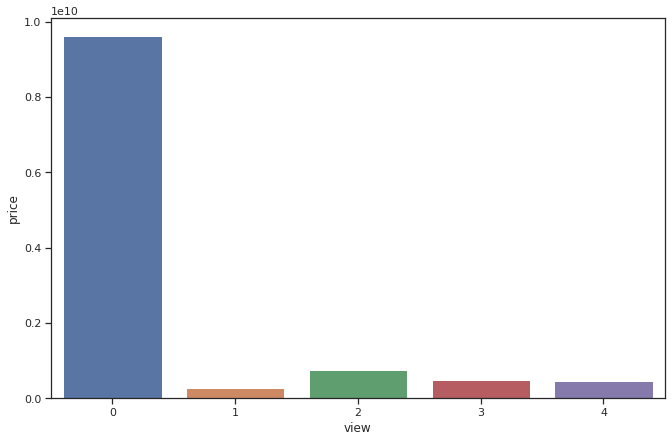

In [24]:
h71 = df[df['condition'] == 1]
h7 = df[['price', 'view']].groupby('view').sum().reset_index()

sns.barplot(h7['view'], h7['price']);


### H8: Imóveis antigos e não renovados são 40% mais baratos. 


<AxesSubplot:xlabel='contrucao', ylabel='price'>

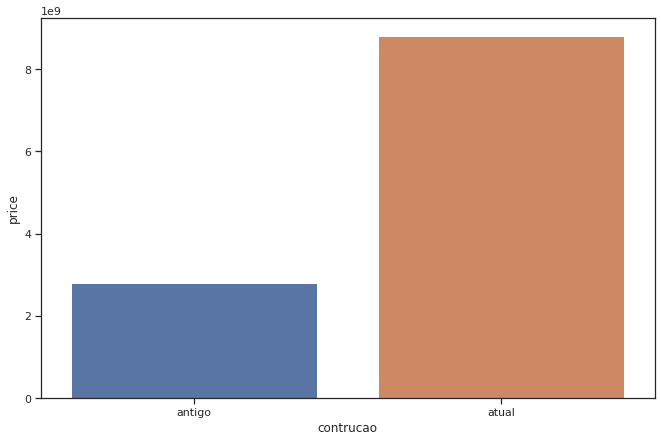

In [25]:
#1. cria coluna renovado ou nao renovado
#2. selecionar imoveis não renovados
#3. agrupar os imoveis não renovados por ano
#4. verificar se os imoveis com datas mais antigas são mais baratos

df['renovacao'] =  df['yr_renovated'].apply(lambda  x: 'sim' if x > 0 else
                                                        'nao')

df['contrucao'] = df['yr_built'].apply(lambda x: 'antigo' if (x < 1951) else
                                               'atual')


h8 = df[df['renovacao'] == 1]

h8 = df[['contrucao', 'price']].groupby('contrucao').sum().reset_index()


sns.barplot(x ='contrucao', y = 'price', data = h8 )

### H9: Imóveis com mais banheiros são em média 5% mais caros.


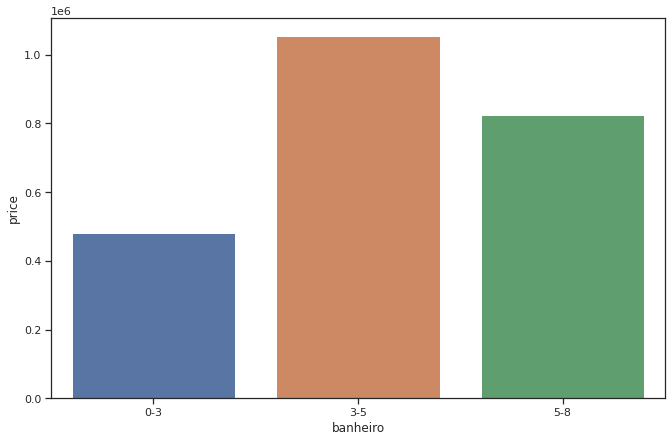

In [26]:
#1. agrupar imoveis por quantidade de banheiros
#2. fazer gráficos com o preço

df['banheiro'] =  df['bathrooms'].apply(lambda x: '0-3' if (x > 0 ) & (x < 3) else
                                                   '3-5' if (x > 3) & (x < 5) else
                                                   '5-8')

h9 = df[['banheiro', 'price', 'sqft_lot']].groupby('banheiro').mean().reset_index()

sns.barplot(x = 'banheiro', y = 'price', data = h9);

### H10: Imóveis renovados recentemente são 35% mais caros.

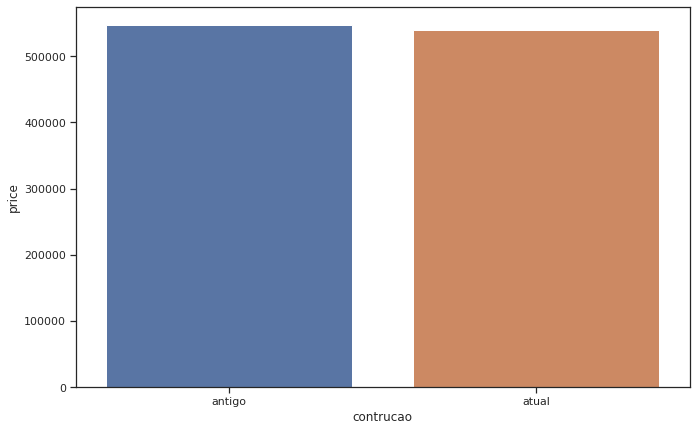

In [27]:
#selecionar imoveis renovados mais recentes
# agrupar com o preço

df['contrucao'] = df['yr_built'].apply(lambda x: 'antigo' if (x < 1951) else
                                               'atual')

h10 = df[['construcao', 'price']].groupby('construcao').mean().reset_index()

sns.barplot(x = 'contrucao', y = 'price', data = h10);

# 3.0 Questão de negócio



## 3.1 Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

In [ ]:
df = df.copy()

### 3.1.1 Quais casas

In [4]:
a = df[['zipcode', 'price']].groupby('zipcode').median().reset_index()


df2 = pd.merge(a, df, on='zipcode', how = 'inner')


df2 = df2.rename(columns = {'price_y' : 'price', 'price_x' : 'price_median'} ) #alterando nome das colunas


#criando coluna
for i, row in df2.iterrows():
    if (row['price_median'] >= row['price']) & (row['condition'] < 3):
        df2.loc[i,'pay'] =  'sim'
    else:
        df2.loc[i, 'pay'] = 'nao'

In [35]:
mapa = px.scatter_mapbox(df2, lat = 'lat', lon = 'long',  
                         
                         color = 'pay', zoom = 10 )
    

mapa.update_layout( mapbox_style = 'open-street-map')
mapa.update_layout( height = 600, margin = {'b':0, 't':0, 'r':0, 'l': 0})
mapa.show()
    

In [5]:

fil_zip = widgets.Dropdown(options = df2['pay'].unique().tolist(),
                       description = 'regiao',
                       disabled = False)


def  update_map (df3, fil_zip):
    house = df2[(df2['pay'] == fil_zip)][['id', 'lat', 'long', 'condition', 'pay', 'price']] 

    mapa = px.scatter_mapbox(house, lat = 'lat', lon = 'long',  
                         size = 'price',
                         color = 'condition', opacity = 0.5, zoom = 10 )
    

    mapa.update_layout( mapbox_style = 'open-street-map')
    mapa.update_layout( height = 600, margin = {'b':0, 't':0, 'r':0, 'l': 0})
    mapa.show()
    

    
widgets.interactive( update_map, df3 = fixed(df2), fil_zip  = fil_zip)

interactive(children=(Dropdown(description='regiao', options=('sim', 'nao'), value='sim'), Output()), _dom_cla…

## 3.2 Uma vez comprado, qual é o melhor momento para vendê-lo e por qual preço?

1.vou agrupar as casas compradas por região e por estação do ano e aplicar a mediana. Depois vou criar uma nova coluna aplicando regra de negócio 

1. criar a sazonalidade, onde a regra é:
if df['mes'] == 12,1,2 == winter
if df['mes'] == 3,4,5 == spring
if df['mes] == 6,7,8 == summer
if df['mes'] == 9,10,11 == fall

2. selecionar somente as casas compradas

3. agrupar as casas por estação e por região e fazer a mediana [price_reg_median]
4. unir o novo df com antigo
5. aplicar a regra de negócio, 
if df['price'] < df[price_reg_median]:
    df[price_reg_median] + 10%

if df['price'] > df[price_reg_median]:
    df[price_reg_median] +  30%



In [30]:
df3 = df2.copy()

df3['season'] = df3['mes'].apply(lambda x: 'summer' if (x > 5) & (x < 8) else
                                           'spring' if (x > 2) & (x < 5) else
                                           'fall' if (x > 8) & (x < 12) else
                                           'winter') 

df3 = df3[df3['pay'] == 'sim']

df4 = df3[['season', 'zipcode', 'price']].groupby(['zipcode', 'season']).median().reset_index()

df4 = df4.rename(columns = {'price' : 'price_medi_season', 'season': 'season_median'} ) 

df5 = pd.merge(df3, df4, on='zipcode', how = 'inner')

for i, row in df5.iterrows():
    if (row['price_medi_season'] > row['price']):
        df5.loc[i, 'sale'] =  row['price'] * 0.1
    else:
        df5.loc[i, 'sale'] = row['price'] * 0.3


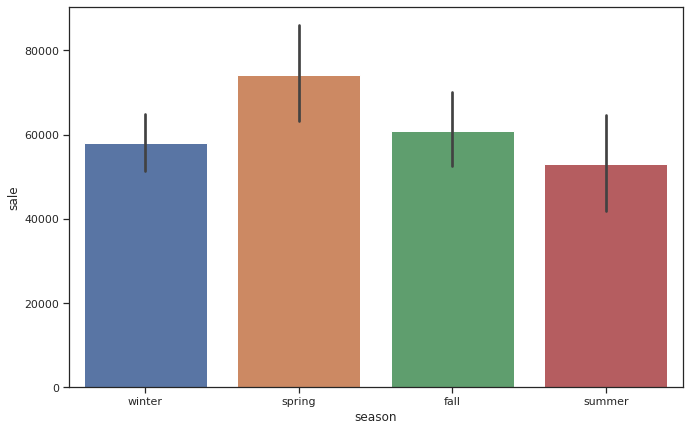

In [33]:
a = df5[['price_medi_season', 'price', 'sale', 'price_median', 'season', 'zipcode']]
a
sns.barplot(data = a, x = 'season', y = 'sale');

In [18]:
values = [['Hipótese','Parecer','Dizeres',],
['H1','Verdadeira','Imóveis com vista para água são mais caros',],
['H2','Falsa','Imóveis com data de construção não parece afetar o preço'],
['H3',
'Verdadeira',
'Imóveis sem porão possuem maior área total e são mais caros'],
['H4',
'Verdadeira',
'Imóveis sem reforma são mais baratos'],
['H5',
'Falso',
'Imóveis com más condições e com vista ruim são mais caros'],
['H6',
'Verdadeira',
'Imóveis antigos que não foram renovados são mais baratos'],
['H7',
'Falso',
'Imóveis que possuem entre 3 – 5 banheiros são mais caros'],
['H8',
'Falso',
'O tempo de renovação não parece influenciar no preço'],
['H9',
'Falso',
'Os imóveis  sofrem decaimento do preço em relação aos meses' ],
['H10',
'Falso',
'Imóveis com 3 banheiros sofrem decaimento do preço em relação aos meses']

          

 ]

print(tabulate (values, headers = 'firstrow'))

Hipótese    Parecer     Dizeres
----------  ----------  -----------------------------------------------------------------------
H1          Verdadeira  Imóveis com vista para água são mais caros
H2          Falsa       Imóveis com data de construção não parece afetar o preço
H3          Verdadeira  Imóveis sem porão possuem maior área total e são mais caros
H4          Verdadeira  Imóveis sem reforma são mais baratos
H5          Falso       Imóveis com más condições e com vista ruim são mais caros
H6          Verdadeira  Imóveis antigos que não foram renovados são mais baratos
H7          Falso       Imóveis que possuem entre 3 – 5 banheiros são mais caros
H8          Falso       O tempo de renovação não parece influenciar no preço
H9          Falso       Os imóveis  sofrem decaimento do preço em relação aos meses
H10         Falso       Imóveis com 3 banheiros sofrem decaimento do preço em relação aos meses
